# Inaugural Project

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import mpl_toolkits.mplot3d

In [12]:

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from inagtobias import householdclass
model = householdclass()
model.solve_discrete(do_print=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000


/Users/tobiasbeyer/Desktop/Polit/3. Semester/Prog/projects-2023-jt/inauguralproject/inagtobias.py:67: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)

In [19]:
# instantiate householdclass
model = householdclass()

# set values of alpha and sigma
alpha_values = [0, 0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]

# create empty lists to store results
HM_list = []
HF_list = []

# loop over alpha and sigma values
for alpha in alpha_values:
    for sigma in sigma_values:
        
        # set values of alpha and sigma in model parameters
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve model discretely
        opt = model.solve_discrete()
        
        # append optimal HM and HF values to lists
        HM_list.append(opt.HM)
        HF_list.append(opt.HF)
        
# print lists of HM and HF values
print("HM values:", HM_list)
print("HF values:", HF_list)


# Converting to arrays to use numpy functions
HM_array = np.array(HM_list)
HF_array = np.array(HF_list)

# Finding the ratio
HF_HM_ratio = HF_array / HM_array

# Plotting
print("HF / HM Ratio", HF_HM_ratio)



HM values: [7.5, 8.0, 8.0, 5.5, 6.5, 7.0, 4.5, 4.5, 4.5, 3.0, 2.0, 1.5]
HF values: [0.5, 0.0, 0.0, 3.0, 2.0, 1.5, 4.5, 4.5, 4.5, 5.5, 6.5, 7.0]
HF / HM Ratio [0.06666667 0.         0.         0.54545455 0.30769231 0.21428571
 1.         1.         1.         1.83333333 3.25       4.66666667]


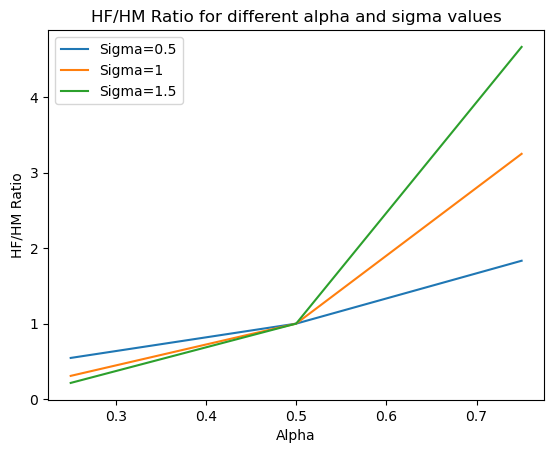

In [16]:
import matplotlib.pyplot as plt

# instantiate householdclass
model = householdclass()

# set values of alpha and sigma
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]

# create empty lists to store results
HM_list = []
HF_list = []

# loop over alpha and sigma values
for alpha in alpha_values:
    for sigma in sigma_values:
        
        # set values of alpha and sigma in model parameters
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve model discretely
        opt = model.solve_discrete()
        
        # append optimal HM and HF values to lists
        HM_list.append(opt.HM)
        HF_list.append(opt.HF)

# Converting to arrays to use numpy functions
HF_array = np.array(HF_list)
HM_array = np.array(HM_list)

# Finding the ratio for each alpha and sigma
HF_HM_ratios = HF_array / HM_array

# Reshaping the array to a matrix with alpha on the rows and sigma on the columns
HF_HM_matrix = HF_HM_ratios.reshape(len(alpha_values), len(sigma_values))

# Plotting the ratios for the different alphas with sigma as a fixed variable
for i in range(len(sigma_values)):
    plt.plot(alpha_values, HF_HM_matrix[:,i], label='Sigma='+str(sigma_values[i]))

plt.xlabel('Alpha')
plt.ylabel('HF/HM Ratio')
plt.title('HF/HM Ratio for different alpha and sigma values')
plt.legend()
plt.show()
